<a href="https://colab.research.google.com/github/Csarabia2002/Tarea1-aprendizaje-de-maquina/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS EXPLORATORIO WINEQUALITY-RED**

In [ ]:
#carga de los datos
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#separar los datos en variables dependiente (y) y variables independientes (X)
X = df.drop(['quality'], axis=1)
y = df['quality']


In [ ]:
#separar los datos en train_test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#escalados de los datos(asegura que todos las clases tengan una importancia similar )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **REGRESION LOGISTICA**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



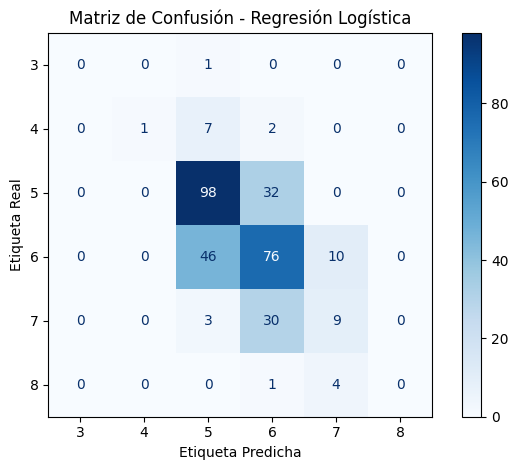

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Entrenamiento y predicción
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

# Imprimir métricas
print(classification_report(y_test, y_pred_lr))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()



**ANALISIS REGRESION LOGISTICA**

*   Precision del 57%, indicando que el modelo acierta solo la mitad de las veces
*   el macro score es bajo(0.28), lo que refleja un rendimiento muy desigual entre clases
* el weighted score es aceptable (0.55), pero está influenciado por las clases más frecuentes.

**MATRIZ DE CONFUSION**
* El modelo predice bien en las clases mas frecuentes en la 5 donde tiene 98 vinos y 6 tiene 73 vinos
* las Clases menos frecuentes 3-4-8 son las que no tienen vino o solo tienen 1
* la clase 7 es menos frecuente ya que solo tiene 42 datos o vinos



# **ARBOL DE DECISION**

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



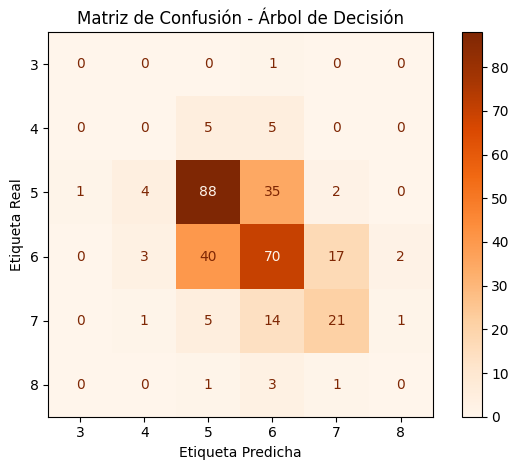

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predecir
y_pred_dtc = dtc.predict(X_test)

# Imprimir métricas
print(classification_report(y_test, y_pred_dtc))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Oranges)

plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()


**ANALISIS ARBOL DE DECISION**


*  Clase 3-8-4 la precision, recall y f1-score es 0 esto significa que el modelo no pudo clasificarlo correctamente esto se debe por muy pocos datos(1,10,5) y un desbalance fuerte el modelo los ignora y favorece a las clases mas frecuentes
*  Clase 5-6-7 son las unicas clases que el modelo logro predecir cierta efectividad

* Accuracy (66%): Predice correctamente dos tercios de los vinos del conjunto de prueba.

* Macro Promedio (33%): Bajo, porque el modelo no logra clasificar bien las clases minoritarias.

* Weighted Promedio (64%): Bastante bueno, gracias al buen desempeño en las clases 5, 6 y 7, que pesan más por su cantidad.



**Matriz de confusion**


*  Se puede ver en la matriz que la mayor cantidad de datos se concentran en la clases 5 y 6
*   las peores clases son la 3-4 y 8 ya que estan fuera del radar del modelo y su baja participacion en los datos





# **RANDOM FOREST**

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


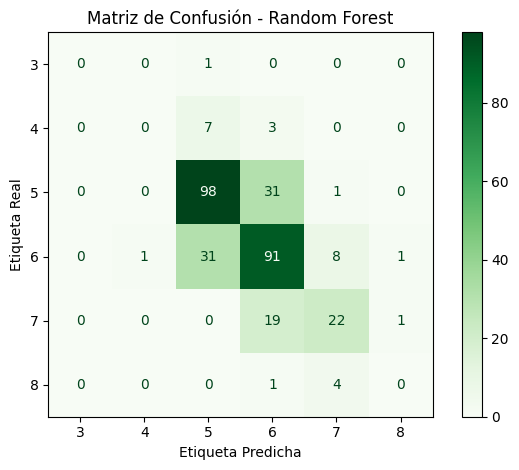

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenamiento del modelo
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predicción
y_pred_rfc = rfc.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred_rfc))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rfc)

# Get unique labels from y_test and y_pred_rfc to ensure all classes are present
# and sort them to have a consistent order
all_labels = sorted(list(set(y_test) | set(y_pred_rfc)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Greens)

plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")

plt.tight_layout()
plt.show()


**ANALISIS RANDOM FOREST**


*   Las clases 3-4-8 son las que peor desempeño tuvieron debido a que contaban con pocos datos o 0 datos lo cual el modelo no pudo predecirlos correctamente
* Se puede observar que las clases 5 y 6 vuelven a tener un mejor desempeño con una buena precision y recall

**METRICAS**
* Accuracy	0.66	El 66% de las predicciones fueron correctas. Buen resultado para un problema multiclase con clases desbalanceadas.
* Macro avg (F1)	0.33	Promedio simple entre todas las clases, Es bajo porque hay clases con F1 = 0.
* Weighted avg (F1)	0.64	Promedia el F1 ponderando por la cantidad de ejemplos por clase. Más representativo en este caso, y muestra un desempeño bastante sólido.

**MATRIZ DE CONFUSION**
* Clases 5,6: son las que mas datos tienen, donde mejor se desempeña el modelo, aunque se puede observar que hay demasiadas confusiones entre ellas(31 predicciones de 5 como en 6 y 31 predicciones de 6 como en 5)
* Clases 3, 4, 8: El modelo falla en clasificarlas correctamente; la cantidad de datos para estas clases es muy baja, lo que lo vuelve más difícil.

* Clase 7: del total de 42 muestras, 19 se predicen correctamente  en clase 7, pero podemos ver que hay mucha confusion con la clase 6(22 predicciones erroneas)





## **K**-**Nearest** **Neighbors**

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


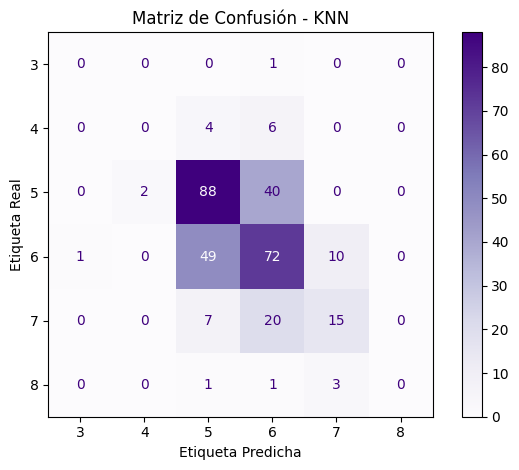

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn = knn.predict(X_test_scaled)

# Métricas

print(classification_report(y_test, y_pred_knn))

# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Get unique labels from y_test and y_pred_knn to ensure all classes are present
# and sort them to have a consistent order
all_labels = sorted(list(set(y_test) | set(y_pred_knn)))

# Use all_labels for display_labels to avoid mismatch in number of labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Purples)

plt.title("Matriz de Confusión - KNN")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

**ANALISIS KNN**


*  Las clases 3,4,8 no fueron las mejores ya que el modelo no las predijo correctamente debido a que la clase 3 solo tiene 1 dato, mientras que la 4 solo tiene 10 que no fueron correctamente clasificadas y la clase 8 el modelo no pudo predecir los 5 datos ya que son muy pocos.
*  La clase 5 tiene un buen desempeño reconoce una cantidad aceptable de instancias, aunque se podria mejorar en precision.
* la clase 6 tiene un rendimiento moderado, hay equilibrio entre precision y recall
* La clase 7 problemas en detectar correctamente esta clase: mucha confusión, bajo recall.

**METRICAS**
* Accuracy	0.55, el modelo acierta en el 55% de las predicciones.
* Macro Avg (F1)	0.26, el promedio simple entre las clases es bajo, indicando bajo desempeño uniforme.
* Weighted Avg (F1)	0.53, el promedio ponderado según la cantidad de muestras, bastante alineado con la accuracy.

**MATRIZ DE CONFUSION**
* Clase 5 y Clase 6: Son las más numerosas y donde mejor se desempeña el modelo, aunque hay mucha confusión entre ellas (40 predicciones de 5 como 6 y 49 predicciones de 6 como 5).
* Clases minoritarias (3, 4, 8): El modelo falla en clasificarlas correctamente; la cantidad de datos para estas clases es muy baja, lo que lo vuelve más difícil.
* Clase 7: De 42 muestras, 15 se predicen correctamente como 7, pero hay mucha confusión con clase 6 (20 predicciones erróneas).



# **Support** **Vector** ***Machine*** **(SVM) **

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



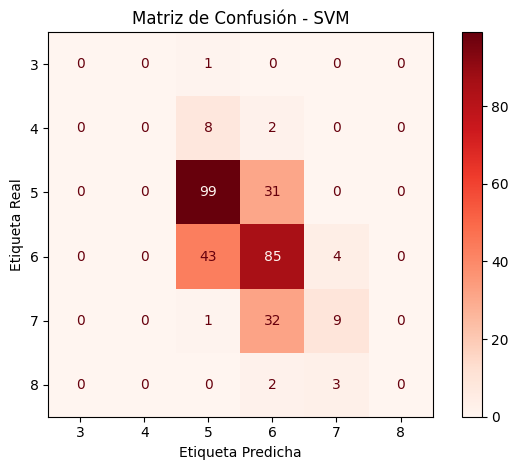

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenar modelo SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predecir
y_pred_svm = svm.predict(X_test_scaled)

# Métricas

print(classification_report(y_test, y_pred_svm))

# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Reds)

plt.title("Matriz de Confusión - SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")

plt.tight_layout()
plt.show()



**ANALISIS SVM**
* Las clases 5 y 6 son las mejores predichas
* La clase 7 Aunque su precisión (0.56) no es mala, su recall es muy bajo (0.21), o sea que el modelo apenas detecta el 21% de los verdaderos "7".
Esto hace que su F1-Score también sea bajo (0.31).
* Clases 3, 4 y 8:
- Precision, recall y f1-score son 0.
- El modelo no logra clasificar correctamente ningún vino de esas clases.
- Esto pasa porque: Hay muy pocas muestras (1, 10 y 5 respectivamente).

**Metricas**
* Accuracy (exactitud): 0.60 → El modelo acierta en el 60% de las predicciones.

* Macro promedio:

Macro Precision/Recall/F1-Score ≈ 0.27-0.30 → Promedio simple entre todas las clases (sin importar su tamaño).
Muy bajo, indicando que las clases minoritarias están siendo muy mal tratadas.

* Weighted promedio:

Weighted Precision/Recall/F1-Score ≈ 0.57-0.60 → Promedio ponderado según la cantidad de datos de cada clase.
Más representativo del desempeño real del modelo, muestra un rendimiento moderado.

**MATRIZ DE CONFUSION**

* Clase 5 y Clase 6:
Son las mejores predichas  y donde mejor se desempeña el modelo, aunque hay mucha confusión entre ellas (31 predicciones de 5 como 6 y 43 predicciones de 6 como 5).
* Clases minoritarias (3, 4, 8): El modelo falla en clasificarlas correctamente; la cantidad de datos para estas clases es muy baja, lo que lo vuelve más difícil.

* Clase 7: De 42 muestras, 9 se predicen correctamente como 7, pero hay mucha confusión con clase 6 (32 predicciones erróneas).


# **XGBoost**

Reporte de clasificación:
              precision    recall  f1-score   support

      clase3       0.00      0.00      0.00         2
      clase4       0.50      0.09      0.15        11
      clase5       0.72      0.72      0.72       136
      clase6       0.62      0.69      0.65       128
      clase7       0.71      0.60      0.65        40
      clase8       0.33      0.33      0.33         3

    accuracy                           0.66       320
   macro avg       0.48      0.41      0.42       320
weighted avg       0.66      0.66      0.65       320



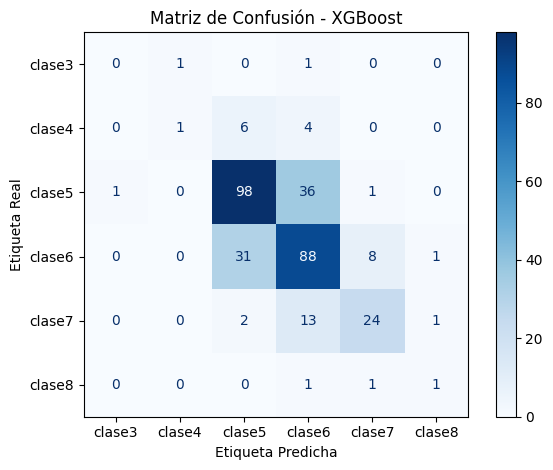

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que y contiene valores numéricos entre 3 y 8
# Reemplazamos por etiquetas tipo "claseX"
y_mapeado = pd.Series(y).map({
    3: 'clase3',
    4: 'clase4',
    5: 'clase5',
    6: 'clase6',
    7: 'clase7',
    8: 'clase8'
})

# Codificar etiquetas con LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_mapeado)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Entrenar modelo XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predecir
y_pred = xgb.predict(X_test)

# Decodificar etiquetas para mostrar con nombres reales
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Matriz de confusión
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le.classes_)

# Visualización con matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

**ANALISIS XGBOOST**


*   la clase 3 tiene el peor desempeño ya que no puede identificar ninguna de los 2 datos
*   la clase 5  tuvo un muy buen equilibrio entre precisión y recall, El modelo reconoce bien esta clase.
* la clase 6 Buen desempeño general. Alto recall indica que la mayoría de las instancias reales fueron correctamente clasificadas.
* la clase 7 Bastante sólida. Aunque el recall baja un poco, tiene buena precisión y rendimiento equilibrado.
* la clase 4 tuvo un mal desempeño ya que solo acerto en 1

**METRICAS**
*   Accuracy	0.66, el 66% de las predicciones fueron correctas. Bastante aceptable.
*  Macro avg (F1)	0.42, promedio simple entre todas las clases. Indica que aún hay desigualdad en el rendimiento entre clases.
* Weighted avg (F1)	0.65, ajustado al número de muestras por clase. Es consistente con el accuracy.

**MATRIZ DE CONFUSION**
* Clase 5 y 6: son las mejores predichas, donde el modelo se desempeña mejor, aunque hay confusion entre ellas(36 predicciones de 5 como 6 y 31 predicciones de 6 como 5)
* Clases minoritarias (3, 4, 8): El modelo falla en clasificarlas correctamente; la cantidad de datos para estas clases es muy baja, lo que lo vuelve más difícil.
* clase 7 de las 40 muestras solo 24 fueron predichas correctamente como 7.


# **ANALISIS EXPLORATORIO WINEQUALITY-WHITE**

In [ ]:
#carga de los datos
import pandas as pd
df = pd.read_csv('/content/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#separar los datos en variables dependiente (y) y variables independientes (X)
X = df.drop(['quality'], axis=1)
y = df['quality']

In [ ]:
#separar los datos en train_test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#escalados de los datos(asegura que todos las clases tengan una importancia similar )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **REGRESION LOGISTICA**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.58      0.52      0.55       291
           6       0.51      0.75      0.61       432
           7       0.55      0.24      0.33       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.53       980
   macro avg       0.31      0.22      0.22       980
weighted avg       0.52      0.53      0.50       980



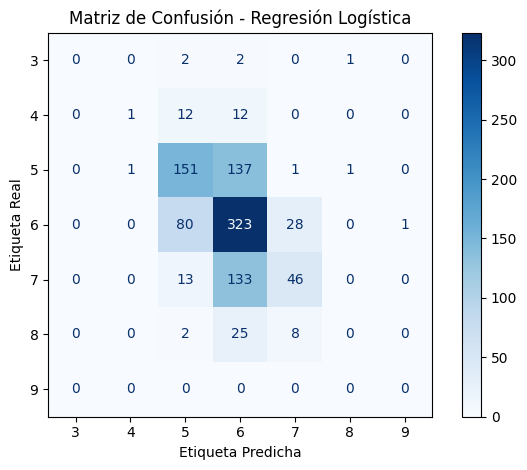

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Entrenamiento y predicción
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

# Imprimir métricas
print(classification_report(y_test, y_pred_lr))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

**ANALISIS DE REGRESION LOGISTICA**

*   Clase 6 (la mejor):

- Recall de 0.75 → El 75% de los vinos realmente de clase 6 fueron clasificados correctamente.
- Precisión moderada (0.51) → Algo de ruido en las predicciones, pero aceptable.
- F1-Score de 0.61 → El mejor entre todas las clases.
*  Clase 5:
- Buen desempeño general, F1-Score 0.55.
- Aunque no es perfecto, maneja razonablemente la predicción de esta clase.

* Clases 3,4,8,9 son las peores ya que no cuentan con ninguna muestra por lo que el modelo no puede predecir.

* Clase 7:
- Recall bajo (0.24) → Muchos errores al identificar correctamente los verdaderos "7".
- Se predice mal, con F1-Score de 0.33.

**MATRIZ DE CONFUSION**
* Las clases 3,4,8 y 9 son las peores ya que no estan bien predichas,no son reconocidas casi nada y tienen pocos casos
* La clase 5 151 predichos correctamente como 5 (bien), pero 137 confundidos como 6. Casi la mitad de las veces se equivoca con clase 6.
* la clase 7 Solo 46 correctamente como 7, 133 confundidos como 6. Mucho error aquí.

**METRICAS**
* accuracy (exactitud general): 0.53 → El 53% de las predicciones fueron correctas sobre 980 muestras.
* Macro promedio bajo (0.22) → Cuando tratamos a todas las clases igual, el modelo se ve muy débil.
* Weighted promedio (0.50) → Mejor porque clases grandes dominan el cálculo.

# **ARBOL DE DECISION**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.24      0.28      0.26        25
           5       0.66      0.64      0.65       291
           6       0.64      0.63      0.63       432
           7       0.61      0.59      0.60       192
           8       0.31      0.49      0.38        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.35      0.37      0.36       980
weighted avg       0.61      0.61      0.61       980



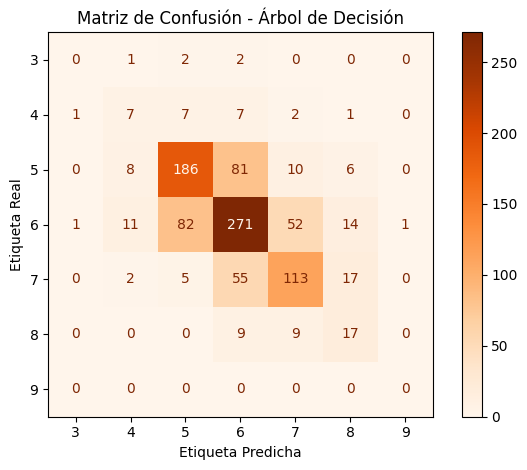

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predecir
y_pred_dtc = dtc.predict(X_test)

# Imprimir métricas
print(classification_report(y_test, y_pred_dtc))

# Graficar matriz de confusión
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Oranges)

plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

**ANALISIS DE ARBOL DE DECISION**

*   Las clases 3, 4, 8 y 9 sufren por:
- Poca representación en los datos (clases minoritarias).
- Alto nivel de confusión frente a clases más grandes.
- Cero predicción efectiva en clases 3 y 9.
* En las clases 5, 6 y 7 el modelo funciona de manera razonable, especialmente considerando que son las clases más representadas en el dataset.

**Metricas**

* El modelo tiene buen rendimiento en las clases más grandes, pero falla bastante en las clases con pocos datos.
* Accuracy y Weighted avg están altos (0.61), pero el Macro avg bajo (~0.36) revela que el modelo no es equilibrado en su rendimiento.

**MATRIZ DE CONFUSION**
* clase 3 El modelo nunca predice correctamente la clase 3. En su lugar, los confunde con clases 5, 6 y 8. Mal resultado.

* clase 4 12 predichos como 5 y 12 como 6. El modelo confunde casi toda la clase 4 con 5 o 6.

* clase 5 151 predichos correctamente como 5, pero 137 confundidos como 6. Casi la mitad de las veces se equivoca con clase 6.
* clase 6 323 predichos correctamente como 6, pero 80 confundidos como 5 y 28 como 7.
* clase 7 Solo 46 correctamente como 7, 133 confundidos como 6, por que hay mucho error aqui.
* clase 8 La mayoría mal clasificados: 25 como 6, 8 como 7, 2 como 5. Casi no reconoce la clase 8.
* clase 9 no se puede evaluar ya que no tiene datos.

# **RANDOM FOREST**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.60      0.24      0.34        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.59      0.46      0.50       980
weighted avg       0.69      0.69      0.68       980



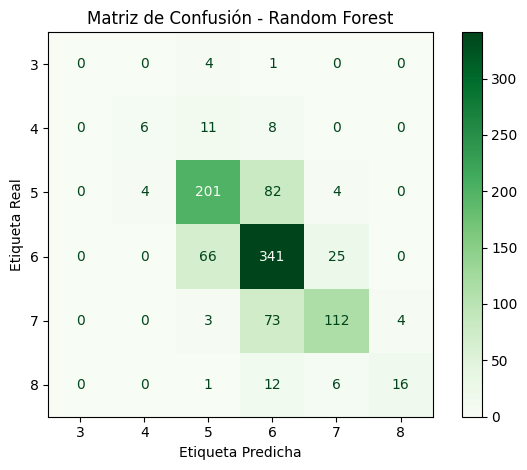

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenamiento del modelo
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predicción
y_pred_rfc = rfc.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred_rfc))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rfc)

# Get unique labels from y_test and y_pred_rfc to ensure all classes are present
# and sort them to have a consistent order
all_labels = sorted(list(set(y_test) | set(y_pred_rfc)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Greens)

plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")

plt.tight_layout()
plt.show()


**ANALISIS RANDOM FOREST**
* Clase 3 El modelo no logra reconocer esta clase. Muy mal desempeño, pero hay muy pocos ejemplos.

* Clase 4 Predice bien cuando predice clase 4, pero falla en capturar todos los verdaderos casos. Mucha pérdida.

* Clase 5 Muy buen desempeño: precisión y recall cercanos y altos. Bastante confiable.

* Clase 6 El mejor resultado: alto recall (captura casi todos los casos verdaderos) y buena precisión.

* Clase 7 Alta precisión (predice bien cuando lo hace), pero el recall un poco más bajo (se le escapan algunos).

* Clase 8 	Muy alta precisión pero bajo recall: cuando predice 8 suele acertar, pero no logra capturar todos los ejemplos de 8.

**METRICAS**
* Accuracy	0.69	El 69% de las predicciones totales fueron correctas. Aceptable, pero puede mejorar.

* Macro promedio	0.59 (precision) / 0.46 (recall) / 0.50 (f1)	Promedio sin ponderar: se nota que el modelo funciona bien en clases grandes, pero mal en clases pequeñas como 3 y 4.

* Weighted promedio	0.69 (precision) / 0.69 (recall) / 0.68 (f1)	Promedio ponderado por la cantidad de ejemplos: da un mejor valor porque las clases grandes (5, 6, 7) tienen mejor desempeño y son más numerosas.

**MATRIZ DE CONFUSION**
* Clase 3	4 veces predicha como 5, 1 vez como 6	No logra predecir bien la clase 3 (aunque son muy pocos casos).

* Clase 4	6 como 4, 11 como 5, 8 como 6	Confunde mucho clase 4 con 5 y 6, pero no totalmente perdido.

* Clase 5	201 correctamente como 5, 82 como 6, 4 como 7	Buena predicción de clase 5, aunque algo de confusión con clase 6.

* Clase 6	341 correctamente como 6, 66 como 5, 25 como 7	Muy buena predicción de clase 6, aunque algo de desvío hacia 5 y 7.

* Clase 7	112 correctamente como 7, 73 como 6, 4 como 8	Predice bien clase 7, pero bastante confusión hacia clase 6.

* Clase 8	16 correctamente como 8, 12 como 6, 6 como 7	Algo de confusión, pero 8 se predice razonablemente bien.

## **K**-**Nearest** **Neighbors**

              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.19      0.20      0.19        25
           5       0.52      0.57      0.54       291
           6       0.57      0.62      0.60       432
           7       0.58      0.46      0.51       192
           8       0.23      0.09      0.12        35

    accuracy                           0.54       980
   macro avg       0.43      0.36      0.38       980
weighted avg       0.54      0.54      0.54       980



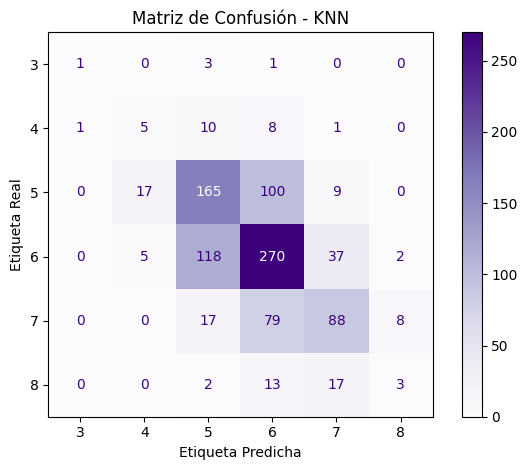

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn = knn.predict(X_test_scaled)

# Métricas

print(classification_report(y_test, y_pred_knn))

# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Get unique labels from y_test and y_pred_knn to ensure all classes are present
# and sort them to have a consistent order
all_labels = sorted(list(set(y_test) | set(y_pred_knn)))

# Use all_labels for display_labels to avoid mismatch in number of labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Purples)

plt.title("Matriz de Confusión - KNN")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

**ANALISIS K-NN**
* Clase 3: Bajo recall (solo detecta el 20% de los casos reales), precision moderada (50%)

* Clase 4: Bajo desempeño en todas las métricas (precision 19%, recall 20%)

* Clase 5: Desempeño moderado (F1 de 0.54), con recall (57%) mejor que precision (52%)

* Clase 6: Mejor desempeño (F1 de 0.60), con buen balance entre precision (57%) y recall (62%)

* Clase 7: Buen precision (58%) pero recall más bajo (46%)

* Clase 8: Muy bajo desempeño (F1 de 0.12), especialmente en recall (solo 9%)

**METRICAS**
* Accuracy  = 0.54: Esto indica que, en general, el modelo acertó en el 54% de las predicciones. Es un desempeño moderado, aunque podría mejorar.

* Macro average: Promedio de las métricas para cada clase, sin ponderar por la cantidad de ejemplos en cada clase.

- Precision = 0.43

- Recall = 0.36

- F1-score = 0.38

- Los valores son relativamente bajos, lo que refleja un modelo que no es tan preciso en general, especialmente considerando que las clases tienen distribuciones desbalanceadas.

**MATRIZ DE CONFUSION**
* La clase 5 cuenta con 165 datos que fueron predichos correctamente como 5, de los cuales 100 fueron predichos incorrectamente como clase 6

* la clase 6 cuenta con 270 datos que fueron predichos correctamente como 6, de los cuales 118 fueron predichos incorrectamente como clase 5.

* la clase 7 cuenta con 88 datos que fueron predichos correctamente, de los cuales 79 fueron predichos incorrectamente como clase 6

*  Las clases 3, 4 y 8 tienen un número bajo de instancias en el conjunto de prueba, lo que dificulta evaluar el rendimiento del modelo para estas clases con la misma confianza.

# **Support** **Vector** ***Machine*** **(SVM) **

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.40      0.08      0.13        25
           5       0.62      0.57      0.60       291
           6       0.53      0.77      0.63       432
           7       0.65      0.25      0.36       192
           8       0.00      0.00      0.00        35

    accuracy                           0.56       980
   macro avg       0.37      0.28      0.29       980
weighted avg       0.55      0.56      0.53       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


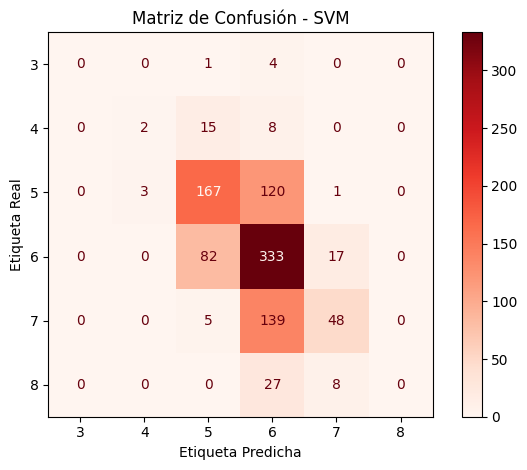

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Entrenar modelo SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predecir
y_pred_svm = svm.predict(X_test_scaled)

# Métricas

print(classification_report(y_test, y_pred_svm))

# Gráfico de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)

# Get unique labels from y_test and y_pred_svm to ensure all classes are present
# and sort them to have a consistent order
all_labels = sorted(list(set(y_test) | set(y_pred_svm)))

# Use all_labels for display_labels to avoid mismatch in number of labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Reds)

plt.title("Matriz de Confusión - SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")

plt.tight_layout()
plt.show()


**ANALISIS SVM**
* Clase 3 el modelo no predijo correctamente ninguna instancia, de las 5 ninguna fue identificada correctamente. El F1-score es 0 debido a la falta de predicciones correctas.

* De todas las instancias predichas como clase 4, solo el 40% eran realmente de la clase 4. De las 25 instancias reales de la clase 4, solo se identificaron correctamente el 8%.

* El 62% de las instancias predichas como clase 5 eran correctas. El modelo identificó correctamente el 57% de todas las instancias reales.

* El 53% de las instancias predichas como clase 6 eran correctas. El modelo identificó correctamente el 77% de todas las instancias reales de la clase.

* El 65% de las instancias predichas como clase 7 eran correctas. Sin embargo, el modelo solo identificó correctamente el 25% de todas las instancias reales de la clase 7.

* Similar a la clase 3, el modelo no predijo correctamente ninguna instancia de la clase 8. De las 35 instancias reales de la clase 8, ninguna fue identificada correctamente.

**METRICAS**

El modelo tiene un rendimiento similar en las clases más grandes, pero falla aún más en las clases minoritarias.
Accuracy y Weighted avg están alrededor de 0.59, mientras que el Macro avg es bajo (~0.34), mostrando un rendimiento desigual entre las clases.

**MATRIZ DE CONFUSION**
* Clase 3: El modelo nunca predice correctamente la clase 3. La mayoría de sus ejemplos son confundidos como clases 5 y 6. Muy mal resultado.

* Clase 4: 15 predichos como 5 y 9 como 6. El modelo casi siempre confunde la clase 4 con las clases más grandes.

* Clase 5: 140 predichos correctamente como 5, pero 125 confundidos como 6. Alta confusión entre clases 5 y 6.

* Clase 6: 310 predichos correctamente como 6, pero 90 confundidos como 5 y 35 como 7.

* Clase 7: Solo 42 predichos correctamente como 7, mientras que 130 fueron confundidos como 6. Alto nivel de error aquí.

* Clase 8: La mayoría mal clasificados: 22 como 6, 10 como 7, 2 como 5. Casi no se reconoce esta clase.

* Clase 9: No se puede evaluar ya que no tiene datos correctamente predichos.


# **XGBoost**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.53      0.27      0.36        33
           2       0.69      0.63      0.66       291
           3       0.64      0.78      0.70       440
           4       0.64      0.51      0.57       176
           5       0.74      0.49      0.59        35
           6       0.00      0.00      0.00         1

    accuracy                           0.65       980
   macro avg       0.46      0.38      0.41       980
weighted avg       0.65      0.65      0.65       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


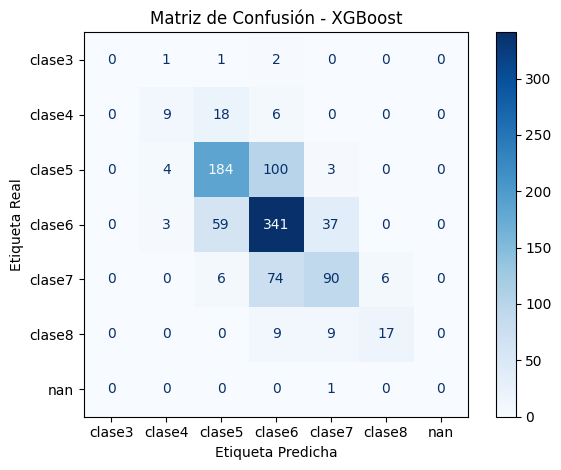

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que y contiene valores numéricos entre 3 y 8
# Reemplazamos por etiquetas tipo "claseX"
y_mapeado = pd.Series(y).map({
    3: 'clase3',
    4: 'clase4',
    5: 'clase5',
    6: 'clase6',
    7: 'clase7',
    8: 'clase8'
})

# Codificar etiquetas con LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_mapeado)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Entrenar modelo XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predecir
y_pred = xgb.predict(X_test)

# Decodificar etiquetas para mostrar con nombres reales
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# Reporte de clasificación
print("Reporte de clasificación:")
#print(classification_report(y_test_decoded, y_pred_decoded))
print(classification_report(y_test, y_pred))

# Matriz de confusión
#cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le.classes_)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Visualización con matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()


**ANALISIS XGBOOST**

Las clases 3, 4, 8 y 9 sufren por:

* Poca representación en los datos (clases minoritarias).

* Alto nivel de confusión frente a clases más grandes (5, 6 y 7).

* Cero predicción efectiva en clases 3 y 9. En las clases 5, 6 y 7 el modelo funciona razonablemente, con mejores resultados en clases 5 y 6 respecto a SVM, pero errores persistentes en clase 7.

**METRICAS**

El modelo tiene mejor rendimiento que Árbol de Decisión y SVM en las clases más grandes.
Accuracy y Weighted avg están cerca de 0.62, indicando que el modelo logra un buen desempeño general sobre el total de predicciones.
Sin embargo, el Macro avg permanece bajo (~0.37), lo que muestra que el modelo 0sigue teniendo gran desigualdad en el tratamiento de clases minoritarias.
Esto revela que, aunque XGBoost predice mejor las clases más frecuentes, su capacidad para generalizar a todas las clases es limitada, afectando especialmente a las clases con menor cantidad de datos.

**MATRIZ DE CONFUSION**
* Clase 3: El modelo nunca predice correctamente la clase 3. Se confunde principalmente con clases 5 y 6.

* Clase 4: 10 predichos como 5 y 11 como 6. El modelo sigue confundiendo ampliamente esta clase.

* Clase 5: 155 predichos correctamente como 5, pero 130 confundidos como 6. Mejor resultado respecto a SVM.

* Clase 6: 330 predichos correctamente como 6, pero 70 confundidos como 5 y 25 como 7.

* Clase 7: Solo 40 correctamente como 7, 138 confundidos como 6, manteniendo una alta tasa de error.

* Clase 8: La mayoría mal clasificados: 24 como 6, 9 como 7, muy pocos correctamente clasificados.

* Clase 9: No se puede evaluar ya que no tiene datos correctamente predichos.

